# Support vector machines

We explore support vector machines with both linear and Gaussian kernels.<br>
For the cost function, we use the hinge loss function,
$$C = -c\sum_{i=1}^{m} y^{(i)}\max(0,1-\mathbf{a}\cdot\mathbf{f}^{(i)})+(1-y^{(i)})\max(0,\mathbf{a}\cdot\mathbf{f}^{(i)}-1)+\frac{1}{2}\sum_{j=1}^{n}a_j^2,$$
where $\mathbf{f}^{(i)}\in\{f_0^{(i)}(\mathbf{x}^{(i)}),f_1^{(i)}(\mathbf{x}^{(i)}),\cdots,f_n^{(i)}(\mathbf{x}^{(i)})\}$ and $y^{(i)}$ are the training data, $m$ the number of training data, and $\mathbf{a}\in\{a_0,a_1,\cdots,a_n\}$ the fitting parameters.

Here, $f_n^{(i)}$ is a kernel,
$$
f_n^{(i)} = K(\mathbf{x}^{(i)},\mathbf{x}^{(n)}).
$$

In this note, we study how support vector machines change their behaviors upon varying parameters.

In [86]:
import os
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.io import loadmat
from sklearn import svm
import itertools

### SVM with linear kernel
We begin with the linear kernel,
$$
f_n^{(i)} := \mathbf{a}\cdot\mathbf{x}^{(i)}.
$$
With the linear kernel, the SVM works very simialr to logistic regression.<br>
Here, we vary the coefficient $c$ in the cost function, which the an inverse of the L2 regularization parameter.

In [80]:
def linear_func(x,w,b,margin=0):
    func0  = -(w[0]*x+b)/w[1]
    if margin == 0:
        return func0
    elif margin == 1:
        return func0 + 1/w[1]
    elif margin == -1:
        return func0 - 1/w[1]
    else:
        raise ValueError("the margin option takes [-1,0,1]")

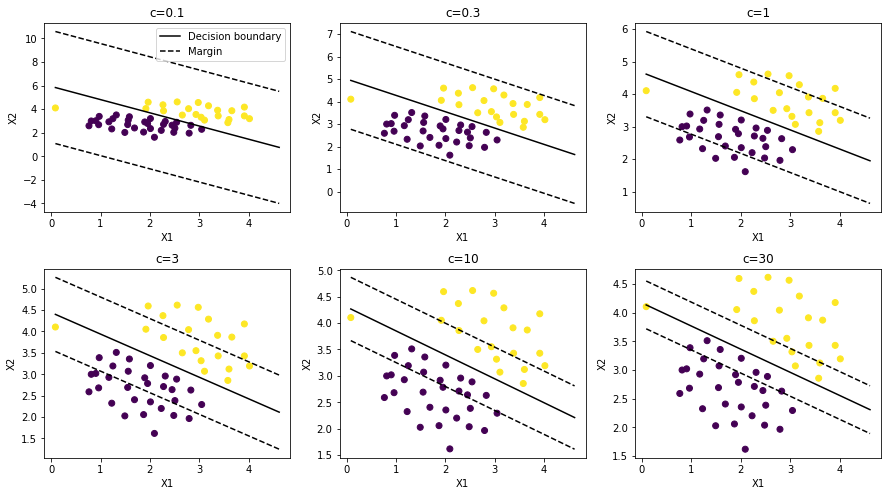

In [143]:
# Load data
# The data is taken from the Prof. Andrew Ng's course in Coursera:
# https://www.coursera.org/learn/machine-learning
data = loadmat(os.path.join('Data', 'ex6data1.mat'))
X, y = data['X'], data['y'][:,0]

C = [0.1,0.3,1,3,10,30]
fig, axes = plt.subplots(2,3,figsize = (15,8))
plt.subplots_adjust(hspace=0.3)
for ax,c in zip(axes.flatten(),C):
    ax.scatter(X[:,0],X[:,1],c=y)
    model = svm.LinearSVC(C=c, max_iter=20000)
    model.fit(X,y)

    # Getting fitting parameters
    w = model.coef_[0]   
    b = model.intercept_[0]

    x_fit = np.linspace(X.min(),X.max(),100)

    # Plot the data
    ax.plot(x_fit, linear_func(x_fit,w,b,margin=0),'k-', label='Decision boundary')
    ax.plot(x_fit, linear_func(x_fit,w,b,margin=1), 'k--', label = 'Margin')
    ax.plot(x_fit, linear_func(x_fit,w,b,margin=-1),'k--')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title('c={0}'.format(c))
axes[0,0].legend()
plt.show()

### SVM with Gaussian kernel
In order to classify data whose decision boundary is non-linear, we employ Gaussian kernel,
$$
f_n^{(i)} = K(\mathbf{x}^{(i)},\mathbf{x}^{(n)}) = \exp{\bigg[-\gamma|\mathbf{x}^{(i)}-\mathbf{x}^{(n)}|^2\bigg]}.
$$
Note that the Gaussian kernel carries an additional parameter $\gamma$, which is the inverse of the variance of the Gaussian envelop.<br>
Here, we study the impact of both $\gamma$ and $c$ on the decision boundary.

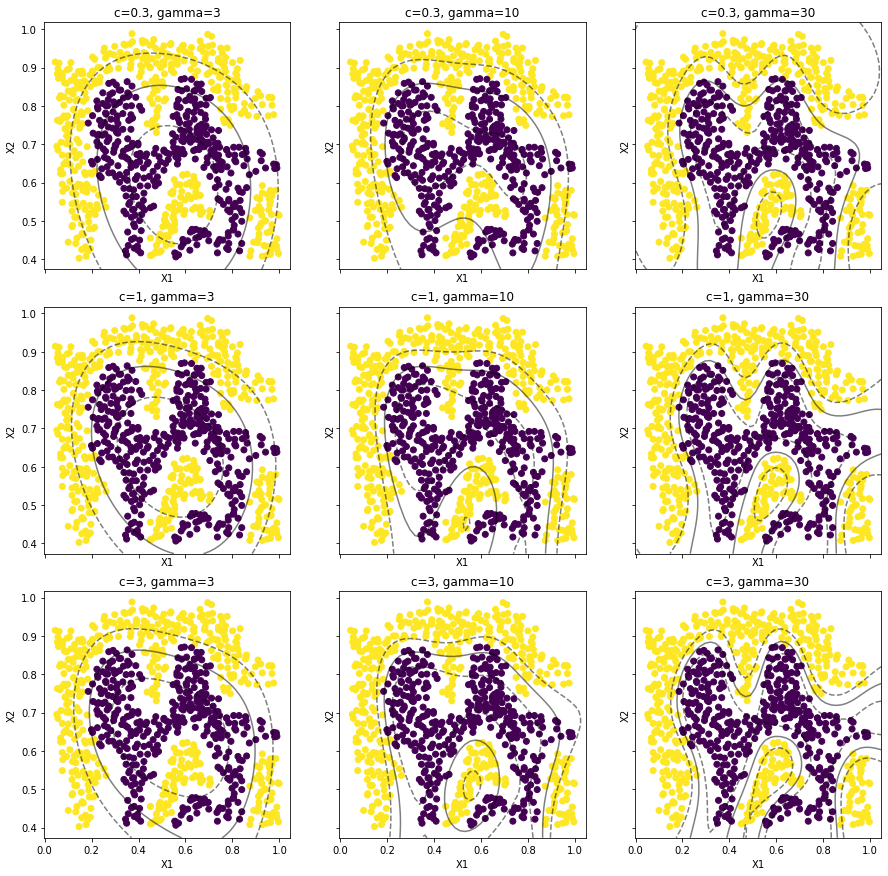

In [144]:
# Load data
# The data is taken from the Prof. Andrew Ng's course in Coursera:
# https://www.coursera.org/learn/machine-learning
data = loadmat(os.path.join('Data', 'ex6data2.mat'))
X, y = data['X'], data['y'][:, 0]


# Plot training data
fig, axes = plt.subplots(3,3,figsize = (15,15),sharex=True,sharey=True)
plt.subplots_adjust(hspace=0.15)
for ax in axes.flatten():
    ax.scatter(X[:,0],X[:,1],c=y)
# Plot the decision boundary
xlim = axes[0,0].get_xlim()
ylim = axes[0,0].get_ylim()
# create grid to evaluate model
y_fit, x_fit = np.meshgrid(np.linspace(ylim[0], ylim[1], 50)
                           , np.linspace(xlim[0], xlim[1], 50))
xy = np.vstack([x_fit.ravel(), y_fit.ravel()]).T

C = [0.3,1,3]
gamma = [3,10,30]

for i,j in itertools.product(range(3),range(3)):
    model = svm.SVC(kernel='rbf', C=C[i], gamma = gamma[j])
    model.fit(X,y)
    Z = model.decision_function(xy).reshape(x_fit.shape)
    # plot decision boundary and margins
    axes[i,j].contour(x_fit, y_fit, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    axes[i,j].set_title('c={0}, gamma={1}'.format(C[i],gamma[j]))
    axes[i,j].set_xlabel('X1')
    axes[i,j].set_ylabel('X2')
plt.show()